# Domain Background

<div style="text-align: justify"> In today's world, marketing is an indispensable component of each and every industry. Marketing particularly assists businesses to increase their brand awareness in the consumer market, which eventually will help them to boost their chances of growth. According to <a href="https://deloitte.wsj.com/articles/who-has-the-biggest-marketing-budgets-1485234137">Wall Street Journal</a>, companies are allocating as high as 24% of their budget towards marketing every year, with an average of 11%. While allocations within the marketing budget can vary from company to company, it generally includes advertisement and discounts. With such a significant amount of budget being spent on marketing, companies are seeking intelligent ways to spend their money optimally. Many companies nowadays have analytics departments that advise them on identifying potential areas to target. The is where Machine Learning, and Data Science in general, starts to play a crucial role. There are various studies exploring the application of machine learning in marketing optimizations [<a href="https://www.zora.uzh.ch/id/eprint/197751/">1</a>], [<a href="https://books.google.com/books?hl=en&lr=&id=o_YtDwAAQBAJ&oi=fnd&pg=PR12&dq=marketing+optimization+machine+learning&ots=g81vbAw2gu&sig=KNG4Uj6LcZYpJxZiQHBYwCSEVnY#v=onepage&q=marketing%20optimization%20machine%20learning&f=false">2</a>], [<a href="https://www.researchgate.net/profile/Sushant-Vishnoi/publication/334626027_ARTIFICIAL_INTELLIGENCE_ENABLED_MARKETING_SOLUTIONS_A_REVIEW_SUSHANT_KUMAR_VISHNOI_TEENA_BAGGA_AARUSHI_SHARMA_AND_SAADAT_NASIR_WANI/links/5d36cc114585153e5919818f/ARTIFICIAL-INTELLIGENCE-ENABLED-MARKETING-SOLUTIONS-A-REVIEW-SUSHANT-KUMAR-VISHNOI-TEENA-BAGGA-AARUSHI-SHARMA-AND-SAADAT-NASIR-WANI.pdf">3</a>]. Machine Learning methods have enabled companies to intelligently decide on how and whom to target with their marketing activities to improve their revenue. Take offering discounts as an example. Companies use discount offers as incentives to persuade potential customers to purchase their product(s). For obvious reasons, they cannot offer discounts to all of their potential customers as it will adversely affect the revenue. Instead, they will offer it only to a proportion of the market. Deciding on whom to offer the discount to is a subject that data scientists and machine learning engineers have investigated thoroughly in recent years [<a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.441.5361&rep=rep1&type=pdf">4</a>], [<a href="http://yadda.icm.edu.pl/baztech/element/bwmeta1.element.baztech-article-BATA-0016-0005">5</a>], [<a href="https://dl.acm.org/doi/abs/10.1145/3383313.3412215">6</a>], identifying customer segmentations who will react favorably to marketing interventions and incentives.
    </div>

# Problem Statement

<div style="text-align: justify"> In the Starbucks Capstone Challenge of Udacity's Machine Learning Engineer Nanodegree, we are given a number of simulated datasets which emulate customer behavior on the Starbucks rewards mobile app. This app is mainly used for sending either informational messages or promotional offers. A customer might be targeted by (1) informational advertisement, (2) discount offer, or (3) buy one get one free (BOGO) offer. The data provided includes the attributes of all offers available, the demographics of each customer, and the features of each transaction made. While it is not possible to send all the offers to all customers, the goal of this project is to extract insights from the data provided and identify customer segmentation and particular offers that they react to better. Additionally, the aim is to design a new recommendation system which specifies which offer (if any) should be given to an individual customer. Exploratory data analysis and machine learning models can help us tackle these questions.
     </div>

# Datasets and Inputs

There are three datasets provided for this project. Each of these tables can help us understand how and in what way each offer is effective in persuading a customer:

* **portfolio.json** - containing offer ids and meta data about each offer (duration, type, etc.). Coming from three main families of promotions (informational, discount, BOGO), there are 10 unique promotions available in this table. There is no monetary incentive associated with informational advertisements. In the discounts offer, the customer will receive some discounts if they spend a particular amount. Lastly, in the BOGO offer, if a customer purchases a product, he/she will receive a free one as well.
* **profile.json** - demographic data for each customer. In this table, some of the values are missing which needs to be addressed before any modeling work.
* **transcript.json** - records for transactions, offers received, offers viewed, and offers completed.

The schema and explanation of each variable in the files are as following:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

<div style="text-align: justify">  
It is important to note that each offer has a validity period before the offer expires, and this includes informational offers. In this case, we will assume that if an informational offer has X days of validity, the customer is feeling the influence of the offer for X days after receiving the advertisement. Another characteristic of the data is that a customer may complete an offer without viewing it. For instance, if a customer receives a BOGO offer with a validity of 7 days, he/she will get a free product at the time of purchase during that week without even seeing the offer. In this case, the offer is completed, but the credit does not go to the offer.
</div>

# Solution Statement

In order to address the questions laid out in the problem statement, we will rely on three main approaches:
* Exploratory Data Analysis
* Predictive Modeling
* Uplift Modeling

<div style="text-align: justify"> <b>Exploratory Data Analysis</b>: This approach will help us to summarize the main characteristics pertinent to our data visually detect patterns in customer behavior and identify particular demographics who react favorably to the offers that the mobile app is providing. This will be our initial investigation towards the data to gather insights for the modeling work.</div>

<div style="text-align: justify"> <b> Predictive Modeling</b>: the initial hypothesis is that customer characteristics and offer attributes are associated with the likelihood of completing an offer and making a purchase. We will build a model (or a suite of models) to find these potential associations. It is worth noting that while this model can provide insights about the purchasing likelihood, it cannot be directly used as a recommendation model.</div>


<div style="text-align: justify"> <b> Uplift Modeling</b>: One of the goals of this project is to design a recommendation system which can assist the mobile app in intelligently sending offers to customers. The logic here is each offer acts as an intervention and an offer should be sent to a customer whose likelihood of purchasing <b>increases</b> if he/she receives the offer. For instance, let's assume customer A's likelihood of purchasing without any offer is 0.7, and if we send him an offer, it will increase to 0.8. On the other hand, customer B will buy our product with the probability of 0.3 and in case of receiving an offer, it will go up to 0.6. While the offer increases customer A's purchasing likelihood by 0.1, this difference for customer B is 0.3. It is evident that customer B is a better candidate to receive our offer. Interestingly, if were to only use a predictive model and utilize the scores to decide which customers to target, we would select customer A. This whole framework is called Uplift Modeling (also known as incremental modeling) which aims to find the <i>change</i> in the likelihood of an event. Uplift modeling is particularly useful in marketing campaigns, as it helps marketing teams to measure the effectiveness of their tactics and isolate their influence. The fundamental issue in uplift modeling is that we cannot measure the effect of an intervention on one individual customer, simply because a customer can either receive or not receive an offer. In this case, what we can do is estimate the uplift based on groups of similar customers. In particular, we classify all customers into four main groups:</div>

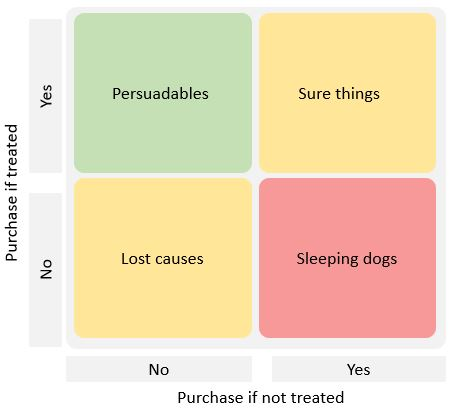

<div style="text-align: justify"> <i>Persuadables</i> are customers who we need to identify and target. These are customers who will purchase our product only if targeted by our treatment/offer. <i>Sure things</i> are will buy our product even if they do not receive any offer. <i>Lost causes</i> are customers are who are not going to purchase even if there are treated. These two groups have zero uplift. Treating these customers would be synonymous with wasting marketing money. The last group is called <i>sleeping dogs</i>. These are customers whose likelihood of purchasing will decrease if treated. It is important to identify these customers as well, since we do not want to lose customers with our marketing activities.</div>

<div style="text-align: justify"> There are three main approaches towards uplift modeling. (1) tree-based algorithms which model uplift directly [<a href="https://proceedings.mlr.press/v67/gutierrez17a/gutierrez17a.pdf">7</a>], [<a href="https://dspace.mit.edu/handle/1721.1/119250">8</a>], (2) meta-learners which model uplift indirectly [<a href="https://arxiv.org/abs/1706.09523">9</a>], [<a href="https://www.pnas.org/content/116/10/4156">10</a>], [<a href="https://arxiv.org/abs/1712.04912">11</a>] (3) and class variable transformation which makes uplift predictable by transforming the response variable [<a href="https://people.cs.pitt.edu/~milos/icml_clinicaldata_2012/Papers/Oral_Jaroszewitz_ICML_Clinical_2012.pdf">12</a>]. In this project, we will try one or two of these algorithms to see which one will provide more value in predicting uplift.</div>

# Benchmark Model

<div style="text-align: justify">
In this project, we will use the current strategy as the benchmark model. We aim to find a model and recommendation system which can provide more value compared to the existing strategy which is encapsulated in the data. Here, we can assume that the offers are sent to customers based on a particular strategy which have already indicated which customers will make a purchase after receiving an offer. We already know that this strategy is not perfect as the data tells us that the offers are also sent to customers who indeed did not purchase the product. Using this as a baseline, we aim to improve the potential customer targeting. </div>

# Evaluation Metrics

<div style="text-align: justify"> In the predictive modeling, we will build a classification model to estimate the likelihood of purchasing given the customers' and offers' attributes. We will assess the performance of this model using accuracy, precision, recall, and F1 score. Below, we show the definition of each metric:</div>

\begin{align}
Accuracy = \frac{TP+TN}{TP+FP+FN+TN}
\end{align}

\begin{align}
Precision = \frac{TP}{TP+FP}
\end{align}

\begin{align}
Recall = \frac{TP}{TP+FN}
\end{align}

\begin{align}
F1 \: Score = \frac{2*Recall*Precision}{Recall+Precision}
\end{align}

<div style="text-align: justify">
    
where TP is the number of True Positives, FP is for False Positives, TN stands for True Negatives, and FN is for False Negatives. </div>
<div style="text-align: justify">
In the uplift modeling, we usually use the predicted uplift scores to rank customers in descending order to find out how many extra customers we would attract, if we used the uplift model to send our offers. Here, we calculate a metric called cumulative gain:</div>
\begin{align}
(\frac{Y^T}{N^T}-\frac{Y^C}{N^C})(N^T+N^C),
\end{align}

<div style="text-align: justify">
where $C$ stands for control (the group of customers who have not received an offer) and $T$ stands for treatment (customers who received an offer/treatment. $Y$ is the number of customers who made a purchase in each bucket of uplift scores and $N$ is the total number of customers in each bucket. We will use this metric to evaluate the goodness of our uplift models.</div>

# Project Design

In order to fulfill the goals of this project, we will follow the steps below:
    
<div style="text-align: justify"> 1. <b>Data Preparation</b>: we will rely on <i>pandas</i> package to read the data and merge the tables to create a unified dataset. </div>
<div style="text-align: justify">2. <b>Exploratory Data Analysis</b>: here we use <i>matplotlib</i> and <i>seaborn</i> packages to extract visual insights from the data through various plotting methods.
<div style="text-align: justify">3. <b>Feature Engineering</b>: we will address missing values through imputation or dropping. We also investigate the possibility of engineering new features that can be used in the modeling stage.</div>
<div style="text-align: justify">4. <b>Predictive Modeling</b>: we will build one or two models to find the association of customer characteristics and offer attributes with the likelihood of making a purchase. We then evaluate the performance of these models using the aforementioned metrics.</div>
<div style="text-align: justify">5. <b>Uplift Modeling</b>: we will build one or two uplift models to design a recommendation system to identify the best offer for each customer given their features in order to increase their likelihood of buying the product. We will assess the performance of these models using cumulative gain plots.</div>
6. Conclusion: we will wrap up the project at this stage, summarizing the main findings and identifying areas for improvement.</div> 

In [ ]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [75]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [76]:
print(len(portfolio))
portfolio.head(10)

10


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [77]:
portfolio = pd.concat([portfolio[['reward','difficulty', 'duration', 'offer_type', 'id']], pd.get_dummies(portfolio['channels'].apply(pd.Series),
                                                      prefix='channel')], axis=1)
portfolio = portfolio.groupby(portfolio.columns, axis=1).sum()
portfolio.head()

,channel_email,channel_mobile,channel_social,channel_web,difficulty,duration,id,offer_type,reward
0,1,1,1,0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,1,1,1,1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,1,1,0,1,0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,1,1,0,1,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,1,0,0,1,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [78]:
portfolio['num_channels'] = portfolio[['channel_email', 'channel_mobile', 'channel_social', 'channel_web']].sum(axis=1)
portfolio.head()

,channel_email,channel_mobile,channel_social,channel_web,difficulty,duration,id,offer_type,reward,num_channels
0,1,1,1,0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,3
1,1,1,1,1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,4
2,1,1,0,1,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,3
3,1,1,0,1,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,3
4,1,0,0,1,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,2


In [80]:
print(len(profile))
profile.head()

17000


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


(array([1308., 1438., 2054., 3383., 3257., 2031.,  966.,  361.,   27.,
        2175.]),
 array([ 18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98., 108., 118.]),
 <BarContainer object of 10 artists>)

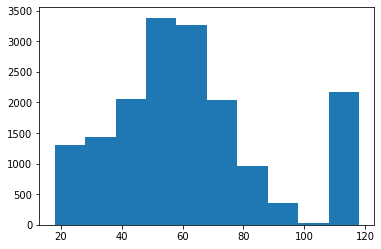

In [81]:
plt.hist(profile['age'])

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1731., 1707., 2234., 2210., 2345., 1435., 1215.,  990.,  498.,
         460.]),
 array([ 30000.,  39000.,  48000.,  57000.,  66000.,  75000.,  84000.,
         93000., 102000., 111000., 120000.]),
 <BarContainer object of 10 artists>)

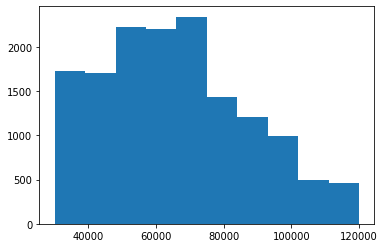

In [82]:
plt.hist(profile['income'])

In [83]:
profile.became_member_on = pd.to_datetime(profile.became_member_on, format = '%Y%m%d')
profile['age'] = np.where(profile['age'] == 118, np.nan, profile['age'])
profile['gender'] = np.where(profile['gender'] == None, np.nan, profile['gender'])
profile['gender'].replace([None], np.nan, inplace=True)
profile.head()

,gender,age,id,became_member_on,income
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [86]:
profile['membership_days'] = datetime.datetime.today().date() - pd.to_datetime(profile['became_member_on'], format='%Y%m%d').dt.date
profile['membership_days'] = profile['membership_days'].dt.days

In [87]:
profile.head()

,gender,age,id,became_member_on,income,membership_days
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,1738
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1585
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,1223
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1652
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,1565


In [90]:
print(len(transcript))
transcript.head()

306534


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [101]:
transcript = pd.concat([transcript.drop(['value'], axis=1), transcript['value'].apply(pd.Series)], axis=1)
transcript.head()

,person,event,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


In [114]:
# keep_df = transcript.copy()

In [121]:
transcript = keep_df.copy()
transcript.head()

In [123]:
transcript['offer_id'] = np.where(transcript['offer id'].isnull(), transcript['offer_id'], transcript['offer id'])
transcript.head()

,person,event,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [124]:
del transcript['offer id']

In [125]:
portfolio.rename(columns={'id': 'offer_id', 'reward':'original_reward'}, inplace=True)
portfolio.head()

,channel_email,channel_mobile,channel_social,channel_web,difficulty,duration,offer_id,offer_type,original_reward,num_channels
0,1,1,1,0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,3
1,1,1,1,1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,4
2,1,1,0,1,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,3
3,1,1,0,1,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,3
4,1,0,0,1,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,2


In [126]:
transcript = transcript.merge(portfolio, on = ['offer_id'], how  ='left')
transcript.head()

,person,event,time,amount,offer_id,reward,channel_email,channel_mobile,channel_social,channel_web,difficulty,duration,offer_type,original_reward,num_channels
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,1.0,1.0,0.0,1.0,5.0,7.0,bogo,5.0,3.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,1.0,0.0,0.0,1.0,20.0,10.0,discount,5.0,2.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,1.0,1.0,0.0,1.0,10.0,7.0,discount,2.0,3.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,1.0,1.0,1.0,1.0,10.0,10.0,discount,2.0,4.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,1.0,1.0,1.0,1.0,10.0,5.0,bogo,10.0,4.0


In [130]:
profile.rename(columns={'id': 'person'}, inplace=True)
profile.head()

,gender,age,person,became_member_on,income,membership_days
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,1738
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1585
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,1223
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1652
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,1565


In [131]:
transcript = transcript.merge(profile, on = ['person'], how  ='left')
transcript.head()

,person,event,time,amount,offer_id,reward,channel_email,channel_mobile,channel_social,channel_web,difficulty,duration,offer_type,original_reward,num_channels,gender,age,became_member_on,income,membership_days
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,1.0,1.0,0.0,1.0,5.0,7.0,bogo,5.0,3.0,F,75.0,2017-05-09,100000.0,1652
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,1.0,0.0,0.0,1.0,20.0,10.0,discount,5.0,2.0,NaN,NaN,2017-08-04,NaN,1565
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,1.0,1.0,0.0,1.0,10.0,7.0,discount,2.0,3.0,M,68.0,2018-04-26,70000.0,1300
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,1.0,1.0,1.0,1.0,10.0,10.0,discount,2.0,4.0,NaN,NaN,2017-09-25,NaN,1513
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,1.0,1.0,1.0,1.0,10.0,5.0,bogo,10.0,4.0,NaN,NaN,2017-10-02,NaN,1506


In [111]:
temp = transcript[(transcript['offer_id'] == '2906b810c7d4411798c6938adc9daaa5')]
temp.head()

,person,event,time,offer id,amount,offer_id,reward
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
12764,73ffefd41e9a4ca3ab26b2b3697c6eb7,offer completed,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
12786,24115a61df25473e84a8a03f3c98de1a,offer completed,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
12826,2481f1fcfbcb4b288e5a03af02d95373,offer completed,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
13183,a45b69f1c8554ae7af83e74426ca437a,offer completed,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,2.0


In [132]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [133]:
transcript["event"].replace(
        {
            'offer received':'offer_received', 
            'offer viewed':'offer_viewed', 
            'offer completed':'offer completed'
        },
        inplace=True,
    )

In [134]:
transcript.head()

,person,event,time,amount,offer_id,reward,channel_email,channel_mobile,channel_social,channel_web,difficulty,duration,offer_type,original_reward,num_channels,gender,age,became_member_on,income,membership_days
0,78afa995795e4d85b5d9ceeca43f5fef,offer_received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,1.0,1.0,0.0,1.0,5.0,7.0,bogo,5.0,3.0,F,75.0,2017-05-09,100000.0,1652
1,a03223e636434f42ac4c3df47e8bac43,offer_received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,1.0,0.0,0.0,1.0,20.0,10.0,discount,5.0,2.0,NaN,NaN,2017-08-04,NaN,1565
2,e2127556f4f64592b11af22de27a7932,offer_received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,1.0,1.0,0.0,1.0,10.0,7.0,discount,2.0,3.0,M,68.0,2018-04-26,70000.0,1300
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer_received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,1.0,1.0,1.0,1.0,10.0,10.0,discount,2.0,4.0,NaN,NaN,2017-09-25,NaN,1513
4,68617ca6246f4fbc85e91a2a49552598,offer_received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,1.0,1.0,1.0,1.0,10.0,5.0,bogo,10.0,4.0,NaN,NaN,2017-10-02,NaN,1506


In [136]:
transcript = pd.concat([transcript.drop(['event'], axis=1), pd.get_dummies(transcript['event'],
                                                      prefix='event')], axis=1)

In [137]:
transcript.head()

,person,time,amount,offer_id,reward,channel_email,channel_mobile,channel_social,channel_web,difficulty,...,num_channels,gender,age,became_member_on,income,membership_days,event_offer completed,event_offer_received,event_offer_viewed,event_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,1.0,1.0,0.0,1.0,5.0,...,3.0,F,75.0,2017-05-09,100000.0,1652,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,1.0,0.0,0.0,1.0,20.0,...,2.0,NaN,NaN,2017-08-04,NaN,1565,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,1.0,1.0,0.0,1.0,10.0,...,3.0,M,68.0,2018-04-26,70000.0,1300,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,1.0,1.0,1.0,1.0,10.0,...,4.0,NaN,NaN,2017-09-25,NaN,1513,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,1.0,1.0,1.0,1.0,10.0,...,4.0,NaN,NaN,2017-10-02,NaN,1506,0,1,0,0
